In [1]:
from __future__ import division

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/Users/KimiZ/Desktop/Schaefer2007_table6.txt', 
                   sep='\t', header=None)

In [18]:
colnames = 'GRB z mag1 mag2 mag3 mag4 mag5 maga magb'.split(' ')

In [19]:
data.columns = colnames

In [20]:
data.head()

,GRB,z,mag1,mag2,mag3,mag4,mag5,maga,magb
0,970228,0.70,\ldots,42.53 \pm 1.31,42.41 \pm 1.16,\ldots,43.42 \pm 1.21,42.79 \pm 0.71,42.56 \pm 0.70
1,970508,0.84,43.09 \pm 1.19,43.13 \pm 1.34,45.66 \pm 1.04,43.92 \pm 0.63,43.09 \pm 1.20,43.92 \pm 0.43,43.68 \pm 0.44
2,970828,0.96,\ldots,42.99 \pm 1.28,44.07 \pm 1.03,43.61 \pm 0.63,43.27 \pm 1.25,43.58 \pm 0.46,43.32 \pm 0.48
3,971214,3.42,48.76 \pm 1.50,48.69 \pm 1.19,47.55 \pm 1.04,\ldots,49.33 \pm 1.33,48.44 \pm 0.62,48.06 \pm 0.61
4,980613,1.10,\ldots,\ldots,45.85 \pm 1.33,\ldots,\ldots,45.85 \pm 1.33,45.63 \pm 1.30


In [21]:
for col in colnames[2:]:
    data[col] = data[col].replace('\ldots', 'NaN')
    data[col] = data[col].replace(' ', '')

In [22]:
data2 = data.copy()

In [23]:
for col in colnames[2:]:
    data2[col+'_err'] = data2[col].str.split(r' \\pm ').str.get(1)
    data2[col] = data2[col].str.split(r' \\pm ').str.get(0)
    

In [24]:
data2

,GRB,z,mag1,mag2,mag3,mag4,mag5,maga,magb,mag1_err,mag2_err,mag3_err,mag4_err,mag5_err,maga_err,magb_err
0,970228,0.70,NaN,42.53,42.41,NaN,43.42,42.79,42.56,NaN,1.31,1.16,NaN,1.21,0.71,0.70
1,970508,0.84,43.09,43.13,45.66,43.92,43.09,43.92,43.68,1.19,1.34,1.04,0.63,1.20,0.43,0.44
2,970828,0.96,NaN,42.99,44.07,43.61,43.27,43.58,43.32,NaN,1.28,1.03,0.63,1.25,0.46,0.48
3,971214,3.42,48.76,48.69,47.55,NaN,49.33,48.44,48.06,1.50,1.19,1.04,NaN,1.33,0.62,0.61
4,980613,1.10,NaN,NaN,45.85,NaN,NaN,45.85,45.63,NaN,NaN,1.33,NaN,NaN,1.33,1.30
5,980703,0.97,44.47,44.91,46.06,43.59,42.11,44.07,43.91,1.03,1.28,1.02,0.58,1.20,0.40,0.42
6,990123,1.61,43.23,44.83,45.59,45.54,NaN,44.99,44.63,1.02,1.21,1.05,0.66,NaN,0.45,0.47
7,990506,1.31,44.82,44.24,44.19,NaN,43.96,44.31,43.99,1.15,1.23,1.03,NaN,1.22,0.57,0.57
8,990510,1.62,46.59,45.27,44.26,45.51,45.69,45.46,45.20,1.08,1.23,1.01,0.56,1.22,0.40,0.41
9,990705,0.84,NaN,45.25,43.58,42.99,45.81,43.77,43.59,NaN,1.22,1.01,0.62,1.32,0.46,0.47


In [33]:
data2.columns

Index([u'GRB', u'z', u'mag1', u'mag2', u'mag3', u'mag4', u'mag5', u'maga',
       u'magb', u'mag1_err', u'mag2_err', u'mag3_err', u'mag4_err',
       u'mag5_err', u'maga_err', u'magb_err'],
      dtype='object')

In [34]:
for col in data2.columns[2:]:
    data2[col] = data2[col].astype('float64')

In [35]:
data2.dtypes

GRB           int64
z           float64
mag1        float64
mag2        float64
mag3        float64
mag4        float64
mag5        float64
maga        float64
magb        float64
mag1_err    float64
mag2_err    float64
mag3_err    float64
mag4_err    float64
mag5_err    float64
maga_err    float64
magb_err    float64
dtype: object

In [36]:
data2.head()

,GRB,z,mag1,mag2,mag3,mag4,mag5,maga,magb,mag1_err,mag2_err,mag3_err,mag4_err,mag5_err,maga_err,magb_err
0,970228,0.70,NaN,42.53,42.41,NaN,43.42,42.79,42.56,NaN,1.31,1.16,NaN,1.21,0.71,0.70
1,970508,0.84,43.09,43.13,45.66,43.92,43.09,43.92,43.68,1.19,1.34,1.04,0.63,1.20,0.43,0.44
2,970828,0.96,NaN,42.99,44.07,43.61,43.27,43.58,43.32,NaN,1.28,1.03,0.63,1.25,0.46,0.48
3,971214,3.42,48.76,48.69,47.55,NaN,49.33,48.44,48.06,1.50,1.19,1.04,NaN,1.33,0.62,0.61
4,980613,1.10,NaN,NaN,45.85,NaN,NaN,45.85,45.63,NaN,NaN,1.33,NaN,NaN,1.33,1.30


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
names = ['GRB', 'z', 'mag1', 'mag1_err', 'mag2', 'mag2_err', 
 'mag3', 'mag3_err', 'mag4', 'mag4_err', 'mag5', 'mag5_err', 
 'maga', 'maga_err', 'magb', 'magb_err']


In [66]:
df = data2.reindex(columns=names)

In [67]:
df

,GRB,z,mag1,mag1_err,mag2,mag2_err,mag3,mag3_err,mag4,mag4_err,mag5,mag5_err,maga,maga_err,magb,magb_err
0,970228,0.70,NaN,NaN,42.53,1.31,42.41,1.16,NaN,NaN,43.42,1.21,42.79,0.71,42.56,0.70
1,970508,0.84,43.09,1.19,43.13,1.34,45.66,1.04,43.92,0.63,43.09,1.20,43.92,0.43,43.68,0.44
2,970828,0.96,NaN,NaN,42.99,1.28,44.07,1.03,43.61,0.63,43.27,1.25,43.58,0.46,43.32,0.48
3,971214,3.42,48.76,1.50,48.69,1.19,47.55,1.04,NaN,NaN,49.33,1.33,48.44,0.62,48.06,0.61
4,980613,1.10,NaN,NaN,NaN,NaN,45.85,1.33,NaN,NaN,NaN,NaN,45.85,1.33,45.63,1.30
5,980703,0.97,44.47,1.03,44.91,1.28,46.06,1.02,43.59,0.58,42.11,1.20,44.07,0.40,43.91,0.42
6,990123,1.61,43.23,1.02,44.83,1.21,45.59,1.05,45.54,0.66,NaN,NaN,44.99,0.45,44.63,0.47
7,990506,1.31,44.82,1.15,44.24,1.23,44.19,1.03,NaN,NaN,43.96,1.22,44.31,0.57,43.99,0.57
8,990510,1.62,46.59,1.08,45.27,1.23,44.26,1.01,45.51,0.56,45.69,1.22,45.46,0.40,45.20,0.41
9,990705,0.84,NaN,NaN,45.25,1.22,43.58,1.01,42.99,0.62,45.81,1.32,43.77,0.46,43.59,0.47


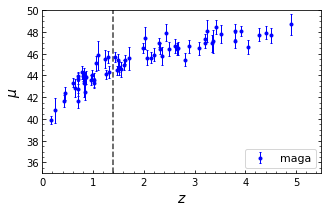

In [69]:
#plt.clf()


plt.figure(figsize=(5,3))
plt.errorbar(df.z, df.maga, yerr=df.maga_err, xerr=None, 
             fmt='.', color='blue', 
             lw=1, capsize=1)
plt.axvline(1.4, 0, 1, alpha=0.75, color='k', ls='--')
plt.minorticks_on()
plt.xlim(0, 5.5)
plt.ylim(35, 50)
plt.legend(loc=0, fontsize=11)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('$\mu$', fontsize=14)
plt.show()

In [ ]:
data = pd.read_csv('/Users/KimiZ/Desktop/Schaefer2007_table6.txt', 
                   sep='\t', header=None)

In [70]:
df.to_csv?

In [72]:
df.to_csv('/Users/KimiZ/Desktop/Schaefer2007_table6_2.txt', 
          sep='\t', index=False)

In [73]:
df2 = pd.read_csv('/Users/KimiZ/Desktop/Schaefer2007_table6_2.txt', 
                  sep='\t')

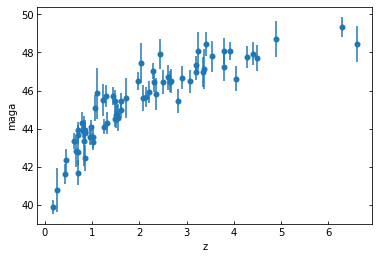

In [87]:
df2.plot.scatter('z', 'maga', yerr='maga_err', lw=1.5)

In [95]:
dat = pd.read_fwf('/Users/KimiZ/Desktop/Kowalski2008_table11.txt', 
                  header=None)

In [96]:
dat

,0,1,2,3,4,5,6,7,8,9,10,11
0,1993ag,0.0500,17.79,0.05,0.91,0.02,0.09,0.02,36.77,0.15,1,NaN
1,1993o,0.0529,17.61,0.05,0.90,0.01,-0.01,0.02,36.82,0.15,1,NaN
2,1993h,0.0251,16.74,0.09,0.68,0.01,0.21,0.01,35.17,0.17,1,NaN
3,1993b,0.0701,18.38,0.09,0.99,0.03,0.04,0.04,37.57,0.15,1,NaN
4,1992bs,0.0627,18.18,0.05,1.00,0.02,-0.03,0.02,37.55,0.15,1,NaN
5,1992br,0.0876,19.40,0.11,0.65,0.04,0.03,0.05,38.19,0.16,1,NaN
6,1992bp,0.0786,18.28,0.03,0.87,0.02,-0.04,0.02,37.52,0.15,1,NaN
7,1992bo,0.0172,15.75,0.13,0.74,0.01,0.03,0.01,34.65,0.19,1,NaN
8,1992bl,0.0422,17.29,0.06,0.79,0.02,-0.01,0.02,36.36,0.15,1,NaN
9,1992bh,0.0453,17.59,0.05,0.98,0.01,0.10,0.01,36.66,0.15,1,NaN


In [97]:
dat

,0,1,2,3,4,5,6,7,8,9,10,11
0,1993ag,0.0500,17.79,0.05,0.91,0.02,0.09,0.02,36.77,0.15,1,NaN
1,1993o,0.0529,17.61,0.05,0.90,0.01,-0.01,0.02,36.82,0.15,1,NaN
2,1993h,0.0251,16.74,0.09,0.68,0.01,0.21,0.01,35.17,0.17,1,NaN
3,1993b,0.0701,18.38,0.09,0.99,0.03,0.04,0.04,37.57,0.15,1,NaN
4,1992bs,0.0627,18.18,0.05,1.00,0.02,-0.03,0.02,37.55,0.15,1,NaN
5,1992br,0.0876,19.40,0.11,0.65,0.04,0.03,0.05,38.19,0.16,1,NaN
6,1992bp,0.0786,18.28,0.03,0.87,0.02,-0.04,0.02,37.52,0.15,1,NaN
7,1992bo,0.0172,15.75,0.13,0.74,0.01,0.03,0.01,34.65,0.19,1,NaN
8,1992bl,0.0422,17.29,0.06,0.79,0.02,-0.01,0.02,36.36,0.15,1,NaN
9,1992bh,0.0453,17.59,0.05,0.98,0.01,0.10,0.01,36.66,0.15,1,NaN


In [100]:
colnames = 'name z m m_err s s_err c c_err mag mag_err ref cut'.split(' ')

In [101]:
dat.columns = colnames

In [102]:
dat

,name,z,m,m_err,s,s_err,c,c_err,mag,mag_err,ref,cut
0,1993ag,0.0500,17.79,0.05,0.91,0.02,0.09,0.02,36.77,0.15,1,NaN
1,1993o,0.0529,17.61,0.05,0.90,0.01,-0.01,0.02,36.82,0.15,1,NaN
2,1993h,0.0251,16.74,0.09,0.68,0.01,0.21,0.01,35.17,0.17,1,NaN
3,1993b,0.0701,18.38,0.09,0.99,0.03,0.04,0.04,37.57,0.15,1,NaN
4,1992bs,0.0627,18.18,0.05,1.00,0.02,-0.03,0.02,37.55,0.15,1,NaN
5,1992br,0.0876,19.40,0.11,0.65,0.04,0.03,0.05,38.19,0.16,1,NaN
6,1992bp,0.0786,18.28,0.03,0.87,0.02,-0.04,0.02,37.52,0.15,1,NaN
7,1992bo,0.0172,15.75,0.13,0.74,0.01,0.03,0.01,34.65,0.19,1,NaN
8,1992bl,0.0422,17.29,0.06,0.79,0.02,-0.01,0.02,36.36,0.15,1,NaN
9,1992bh,0.0453,17.59,0.05,0.98,0.01,0.10,0.01,36.66,0.15,1,NaN


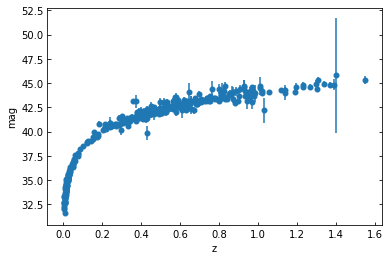

In [103]:
dat.plot.scatter('z', 'mag', yerr='mag_err', lw=1.5)

In [104]:
dat.to_csv('/Users/KimiZ/Desktop/Kowalski2008_table11_2.txt', 
           sep='\t', index=False)

In [105]:
dat2 = pd.read_csv('/Users/KimiZ/Desktop/Kowalski2008_table11_2.txt', 
                  sep='\t')

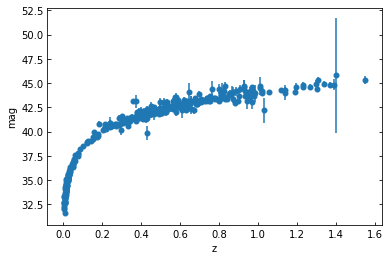

In [106]:
dat2.plot.scatter('z', 'mag', yerr='mag_err', lw=1.5)